In [1]:
import numpy as np
import os
import json
import pandas as pd

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

from sklearn.metrics import roc_curve, auc

# Process Experiment Results

This notebook generates the metrics and grpahs presented in the publication.

In [2]:
embeddings_metadata = {
    "bge-reranker-v2-m3" : {
        "params" : 0.568,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "BAAI/bge-reranker-v2-m3"
    },
    "bge-reranker-v2-m3---no-enhance" : {
        "params" : 0.568,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "BAAI/bge-reranker-v2-m3"
    },
    "gte-modernbert-base" : {
        "params" : 0.150,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "Alibaba-NLP/gte-modernbert-base"
    },
    "gte-modernbert-base---no-enhance" : {
        "params" : 0.150,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Alibaba-NLP/gte-modernbert-base"
    },
    "gte-reranker-modernbert-base" : {
        "params" : 0.150,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "Alibaba-NLP/gte-reranker-modernbert-base"
    },
    "gte-reranker-modernbert-base---no-enhance" : {
        "params" : 0.150,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "Alibaba-NLP/gte-reranker-modernbert-base"
    },
    "jina-reranker-v2-base-multilingual" : {
        "params" : 0.278,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "jinaai/jina-reranker-v2-base-multilingual"
    },
    "jina-reranker-v2-base-multilingual---no-enhance" : {
        "params" : 0.278,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "jinaai/jina-reranker-v2-base-multilingual"
    },
    "multilingual-e5-large-instruct" : {
        "params" : 0.560,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "intfloat/multilingual-e5-large-instruct"
    },
    "multilingual-e5-large-instruct---no-enhance" : {
        "params" : 0.560,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "intfloat/multilingual-e5-large-instruct"
    },
    "multilingual-e5-large-instruct---no-instruct,no-enhance" : {
        "params" : 0.560,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "intfloat/multilingual-e5-large-instruct"
    },
    "Qwen3-Embedding-0.6B" : {
        "params" : 0.6,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "Qwen/Qwen3-Embedding-0.6B"
    },
    "Qwen3-Embedding-0.6B---no-enhance" : {
        "params" : 0.6,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-0.6B"
    },
    "Qwen3-Embedding-0.6B---no-instruct,no-enhance" : {
        "params" : 0.6,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-0.6B"
    },
    "Qwen3-Embedding-4B" : {
        "params" : 4,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "Qwen/Qwen3-Embedding-4B"
    },
    "Qwen3-Embedding-4B---no-enhance" : {
        "params" : 4,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-4B"
    },
    "Qwen3-Embedding-4B---no-instruct,no-enhance" : {
        "params" : 4,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-4B"
    },
    "Qwen3-Reranker-0.6B-seq-cls" : {
        "params" : 0.6,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-0.6B-seq-cls"
    },
    "Qwen3-Reranker-0.6B-seq-cls---no-enhance" : {
        "params" : 0.6,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-0.6B-seq-cls"
    },
    "Qwen3-Reranker-4B-seq-cls" : {
        "params" : 4,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-4B-seq-cls"
    },
    "Qwen3-Reranker-4B-seq-cls---no-enhance" : {
        "params" : 4,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-4B-seq-cls"
    },
    "Qwen3-Reranker-8B-seq-cls" : {
        "params" : 8,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-8B-seq-cls"
    },
    "Qwen3-Reranker-8B-seq-cls---no-enhance" : {
        "params" : 8,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-8B-seq-cls"
    },
    "Qwen3-Embedding-8B" : {
        "params" : 8,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "Qwen/Qwen3-Embedding-8B"
    },
    "Qwen3-Embedding-8B---no-enhance" : {
        "params" : 8,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-8B"
    },
    "Qwen3-Embedding-8B---no-instruct,no-enhance" : {
        "params" : 8,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-8B"
    },
}




In [3]:
DATA_PATH = f'../data/exploratory_analysis/'
TAGS_PATH = f'../data/implemented/'
BASELINES_PATH = f'../data/baselines/'

BEST_MODEL = "Qwen3-Reranker-4B-seq-cls"
BEST_IS_INSTRUCTED = True
BEST_IS_RERANKER = True
BEST_IS_ENHANCED = True

### Load human tags

In [4]:
tags_rows = list()
for lm_dir in os.listdir(TAGS_PATH):
    model_path = os.path.join(TAGS_PATH, lm_dir)
    if not os.path.isdir(model_path):
        continue
    # The file should be here
    tags_path = os.path.join(TAGS_PATH, lm_dir, "human_labels.jsonl")
    # Read all lines
    with open(tags_path, 'r') as f:
        for i, line in enumerate(f):
            obj = json.loads(line)
            tags_rows.append(
                [
                    lm_dir,
                    obj["dataset_task"],
                    obj["line"],
                    obj["label"]=="Correct",
                ]
            )
tags_df = pd.DataFrame(tags_rows, columns=["language_model", "dataset_task", "prompt_idx", "human_tag"])
print(f"Read {len(tags_df)} tagged samples")

Read 6340 tagged samples


In [5]:
tags_df.head()

,language_model,dataset_task,prompt_idx,human_tag
0,gpt-oss-20b,babi-task_15-basic_deduction,10,True
1,gpt-oss-20b,babi-task_15-basic_deduction,11,True
2,gpt-oss-20b,babi-task_15-basic_deduction,12,True
3,gpt-oss-20b,babi-task_15-basic_deduction,13,True
4,gpt-oss-20b,babi-task_15-basic_deduction,14,True


### Load exploratory tests

In [6]:
data_rows = list()
# For each embedding model tested
for emb_model_dir in os.listdir(DATA_PATH):
    emb_path = os.path.join(DATA_PATH, emb_model_dir)
    if not os.path.isdir(emb_path):
        continue
    # For each LM tested
    for lm_dir in os.listdir(emb_path):
        # For each results file
        model_path = os.path.join(emb_path, lm_dir)
        for result_file in os.listdir(model_path):
            if ".jsonl" not in result_file:
                continue
            # Read all lines
            with open(os.path.join(model_path, result_file), 'r') as f:
                for i, line in enumerate(f):
                    obj = json.loads(line)
                    # Get model metadata
                    model_metadata = embeddings_metadata[emb_model_dir]
                    # Add entry
                    data_rows.append(
                        [
                            model_metadata["huggingface_name"].split("/")[-1],
                            model_metadata["params"],
                            model_metadata["instruction_applied"],
                            model_metadata["reranker"],
                            model_metadata["a-vert_enhance"],
                            lm_dir,
                            result_file.split('_2025')[0].split('samples_')[-1],
                            obj["doc_id"],
                            obj["a-vert_match"],
                            obj["a-vert_correct_score"],
                            obj["a-vert_wrong_score"],
                            obj["semscore"],
                        ]
                    )
                    
data_df = pd.DataFrame(data_rows, columns=["embedding_model", 
                                           "params_billons",
                                           "instruction_applied",
                                           "reranker",
                                           "enhance",
                                           "language_model", 
                                           "dataset_task", 
                                           "prompt_idx", 
                                           "a-vert_match", 
                                           "a-vert_correct_score", 
                                           "a-vert_wrong_score", 
                                           "semscore"])
print(f"Read {len(data_df)} experiment samples")

Read 655200 experiment samples


In [7]:
data_df.head()

,embedding_model,params_billons,instruction_applied,reranker,enhance,language_model,dataset_task,prompt_idx,a-vert_match,a-vert_correct_score,a-vert_wrong_score,semscore
0,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,0,True,0.579398,0.420602,0.0
1,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,1,True,0.584551,0.415449,0.0
2,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,2,True,0.584890,0.415110,0.0
3,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,3,True,0.574971,0.425029,0.0
4,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,4,True,0.575064,0.424936,0.0


### Combine experiment data with tags

In [8]:
merged_df = pd.merge(tags_df, data_df, on=['language_model', 'dataset_task', 'prompt_idx'])
# Create a column where the human tag and a-vert agree
merged_df["agree"] = merged_df["human_tag"]==merged_df["a-vert_match"]
print(f"Total number of test samples tagged: {len(merged_df)}\n")
print("Samples per LM:")
print(merged_df['language_model'].value_counts())
print("")
print("Samples per embedding/reranker:")
print(merged_df['embedding_model'].value_counts())


Total number of test samples tagged: 152160

Samples per LM:
language_model
Meta-Llama-3-3-70B-Instruct-AWQ-INT4    62160
gpt-oss-20b                             46320
Qwen3-30B-A3B-GPTQ-Int4                 43680
Name: count, dtype: int64

Samples per embedding/reranker:
embedding_model
Qwen3-Embedding-4B                    19020
Qwen3-Embedding-0.6B                  19020
multilingual-e5-large-instruct        19020
gte-reranker-modernbert-base          12680
Qwen3-Reranker-8B-seq-cls             12680
Qwen3-Reranker-0.6B-seq-cls           12680
bge-reranker-v2-m3                    12680
gte-modernbert-base                   12680
Qwen3-Reranker-4B-seq-cls             12680
jina-reranker-v2-base-multilingual    12680
Qwen3-Embedding-8B                     6340
Name: count, dtype: int64


In [9]:
def get_type(row):
    _,row=row
    if "babi" in row['dataset_task']:
        return "bAbI / open-ended"
    else:
        return "MMLU / multiple-choice"
    
merged_df['task_type'] = [get_type(a) for a in merged_df.iterrows()]

In [10]:
merged_df.head()

,language_model,dataset_task,prompt_idx,human_tag,embedding_model,params_billons,instruction_applied,reranker,enhance,a-vert_match,a-vert_correct_score,a-vert_wrong_score,semscore,agree,task_type
0,gpt-oss-20b,babi-task_15-basic_deduction,10,True,Qwen3-Embedding-4B,4.00,True,False,True,True,0.549356,0.450644,0.000000,True,bAbI / open-ended
1,gpt-oss-20b,babi-task_15-basic_deduction,10,True,gte-reranker-modernbert-base,0.15,False,True,False,True,0.549046,0.450954,0.000000,True,bAbI / open-ended
2,gpt-oss-20b,babi-task_15-basic_deduction,10,True,Qwen3-Reranker-8B-seq-cls,8.00,True,True,True,True,0.991966,0.008034,0.000000,True,bAbI / open-ended
3,gpt-oss-20b,babi-task_15-basic_deduction,10,True,Qwen3-Embedding-4B,4.00,False,False,False,True,0.531409,0.468591,0.000000,True,bAbI / open-ended
4,gpt-oss-20b,babi-task_15-basic_deduction,10,True,Qwen3-Reranker-0.6B-seq-cls,0.60,True,True,False,True,0.951505,0.048495,0.739704,True,bAbI / open-ended


In [11]:
def calculate_metrics(df):
    true_labels_binary = df['human_tag']
    predicted_labels_binary = df['a-vert_match']

    precision = precision_score(true_labels_binary, predicted_labels_binary)
    recall = recall_score(true_labels_binary, predicted_labels_binary)
    f1 = f1_score(true_labels_binary, predicted_labels_binary)
    specificity = recall_score(1-true_labels_binary, 1-predicted_labels_binary)
    balanced_accuracy = balanced_accuracy_score(true_labels_binary, predicted_labels_binary)

    return precision, recall, f1, specificity, balanced_accuracy

accurracy_compare_rows = list()
for model in list(merged_df['embedding_model'].unique()):
    for with_instrct in [True, False]:
        for with_enhance in [True, False]:
            for is_reranker in [True, False]:
                this_df = merged_df.loc[merged_df["embedding_model"] == model]
                this_df = this_df.loc[this_df["instruction_applied"] == with_instrct]
                if len(this_df) == 0 :
                    continue
                this_df = this_df.loc[this_df["enhance"] == with_enhance]
                if len(this_df) == 0 :
                    continue
                this_df = this_df.loc[this_df["reranker"] == is_reranker]
                if len(this_df) == 0 :
                    continue

                
                if with_instrct and with_enhance:
                    config_string = "instruction + enhance"
                elif with_instrct and not with_enhance:
                    config_string = "instruction"
                elif not with_instrct and with_enhance:
                    config_string = "enhance"
                else:
                    config_string = "base"
                
                # Compute
                precision, recall, f1, specificity, balanced_accuracy = calculate_metrics(this_df)
                # Track
                accurracy_compare_rows.append(
                    [
                        config_string,
                        model,
                        this_df["params_billons"].unique()[0],
                        with_instrct,
                        with_enhance,
                        is_reranker,
                        precision, 
                        recall, 
                        f1, 
                        specificity, 
                        balanced_accuracy
                    ]
                )
accurracy_compare_df = pd.DataFrame(accurracy_compare_rows, columns=[
                        "\nConfiguration:",
                        "Model:",
                        "params",
                        "with_instrct",
                        "with_enhance",
                        "is_reranker",
                        "precision", 
                        "recall", 
                        "f1", 
                        "specificity", 
                        "balanced_accuracy"
                    ])

# Plots

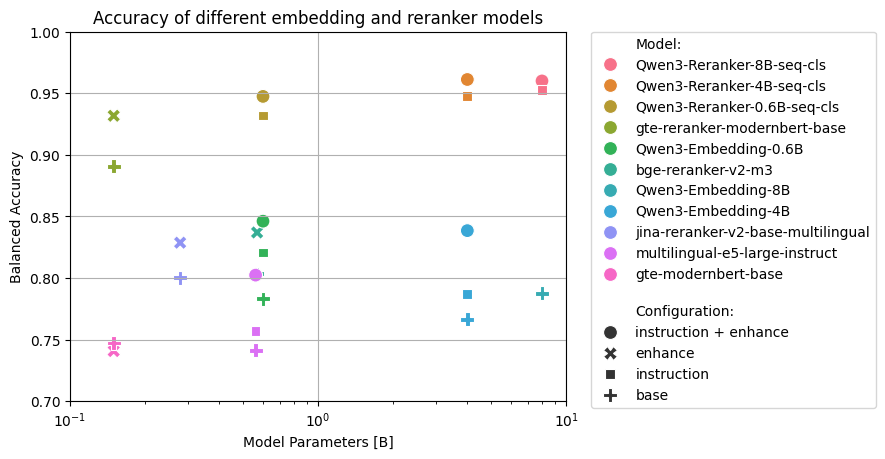

In [12]:


scatter = sns.scatterplot(data=accurracy_compare_df, 
                          x="params", 
                          y="balanced_accuracy", 
                          hue='Model:', 
                          hue_order=[
                                "Qwen3-Reranker-8B-seq-cls",
                                "Qwen3-Reranker-4B-seq-cls",
                                "Qwen3-Reranker-0.6B-seq-cls",                               
                                "gte-reranker-modernbert-base",
                                "Qwen3-Embedding-0.6B",
                                "bge-reranker-v2-m3",
                                "Qwen3-Embedding-8B",
                                "Qwen3-Embedding-4B",
                                "jina-reranker-v2-base-multilingual",
                                "multilingual-e5-large-instruct",
                                "gte-modernbert-base",
                                ],
                          style='\nConfiguration:', 
                          style_order=["instruction + enhance", "enhance", "instruction", "base"],
                          s=100)
plt.ylim(0.70,1.0)
plt.xlim(0.1,10.0)
plt.grid()
plt.title('Accuracy of different embedding and reranker models')
plt.xlabel("Model Parameters [B]")
plt.ylabel("Balanced Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
plt.show()

Precision: 0.99
Recall: 0.98
Specificity: 0.94
F1: 0.99
Balanced Accuracy: 0.96


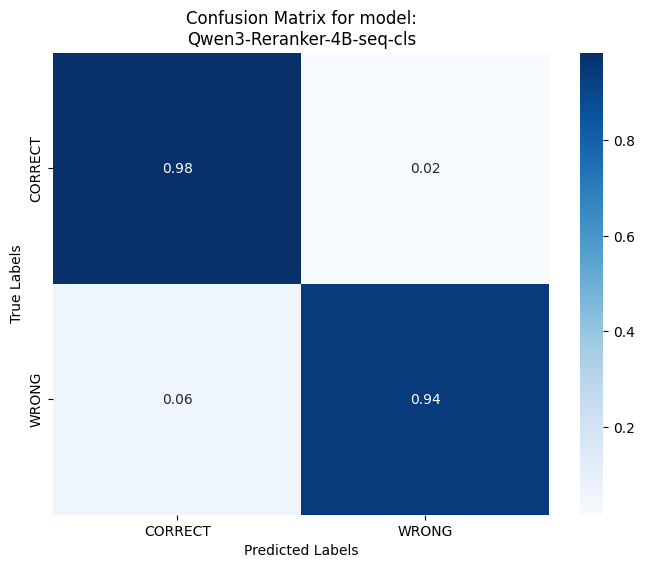

In [13]:
plot_df = merged_df.loc[(merged_df["embedding_model"].str.contains(BEST_MODEL)) *\
                         (merged_df["enhance"]==BEST_IS_ENHANCED) *\
                         (merged_df["reranker"]==BEST_IS_RERANKER) *\
                         (merged_df["instruction_applied"]==BEST_IS_INSTRUCTED) ]

precision, recall, f1, specificity, balanced_accuracy = calculate_metrics(plot_df)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1: {f1:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Get labels in the order for plotting the confusion matrix
true_labels = 1-plot_df['human_tag']
predicted_labels = 1-plot_df['a-vert_match']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels).astype(np.float64)
conf_matrix[0,:] /= conf_matrix.sum(axis=-1)[0]
conf_matrix[1,:] /= conf_matrix.sum(axis=-1)[1]
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='0.2f', cmap='Blues',
            xticklabels=['CORRECT', 'WRONG'],
            yticklabels=['CORRECT', 'WRONG'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for model:\n{BEST_MODEL}')
plt.show()


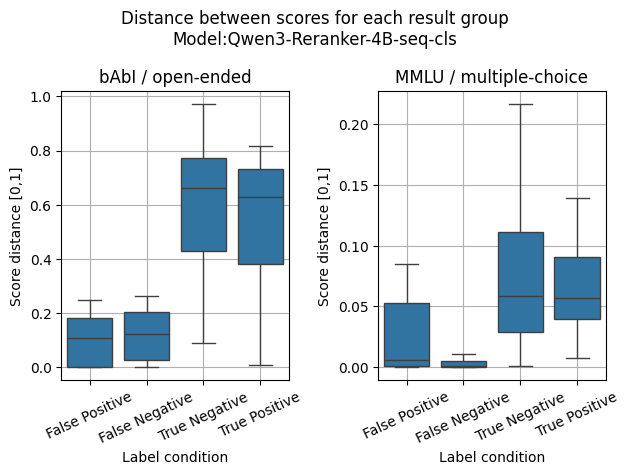

In [14]:

    
def get_group(row):
    _,row=row
    if row['human_tag'] and row['agree']:
        return "True Positive"
    if row['human_tag'] and not row['agree']:
        return "False Negative"
    if not row['human_tag'] and row['agree']:
        return "True Negative"
    if not row['human_tag'] and not row['agree']:
        return "False Positive"


plot_df = merged_df.loc[(merged_df["embedding_model"].str.contains(BEST_MODEL)) *\
                         (merged_df["enhance"]==BEST_IS_ENHANCED) *\
                         (merged_df["reranker"]==BEST_IS_RERANKER) *\
                         (merged_df["instruction_applied"]==BEST_IS_INSTRUCTED) ]

# plot_df = plot_df.loc[plot_df["task_type"]=="bAbI / open-ended"]



plot_df = plot_df.groupby(['agree', 'human_tag', "dataset_task", "task_type"]).agg(
        {
            'a-vert_correct_score' : 'mean',
            'a-vert_wrong_score' : 'mean',
        }
    ).reset_index()
plot_df['score_distance']=plot_df['a-vert_correct_score']-plot_df['a-vert_wrong_score']
plot_df['score_abs_distance']=np.abs(plot_df['score_distance'])
plot_df['group'] = [get_group(a) for a in plot_df.iterrows()]

plt.figure()  

for i, data_part in enumerate(["bAbI / open-ended", "MMLU / multiple-choice"]):
    plot_df2 = plot_df.loc[(plot_df["task_type"]==data_part)]
    # plot_df.boxplot(by='group', column =['score_distance'])
    ax=plt.subplot(1,2,i+1)
    sns.boxplot(data=plot_df2, x="group", y="score_abs_distance", ax=ax, showfliers=False)

    plt.grid()
    plt.xlabel("Label condition")
    plt.ylabel("Score distance [0,1]")
    plt.xticks(rotation=25)
    plt.title(data_part)

plt.suptitle(f'Distance between scores for each result group\nModel:{BEST_MODEL}')

plt.tight_layout()
plt.show()

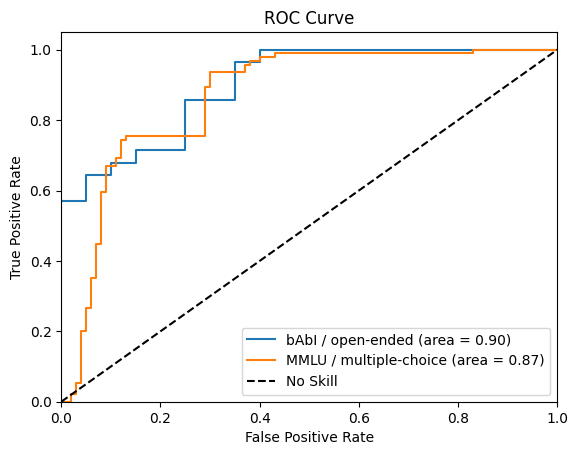

In [15]:
plt.figure()  
for data_part in ["bAbI / open-ended", "MMLU / multiple-choice"]:
    plot_df2 = plot_df.loc[(plot_df["task_type"]==data_part)]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(plot_df2['human_tag'], plot_df2['a-vert_correct_score']) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve

    plt.plot(fpr, tpr, label=f'{data_part} (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# SemScore Analysis

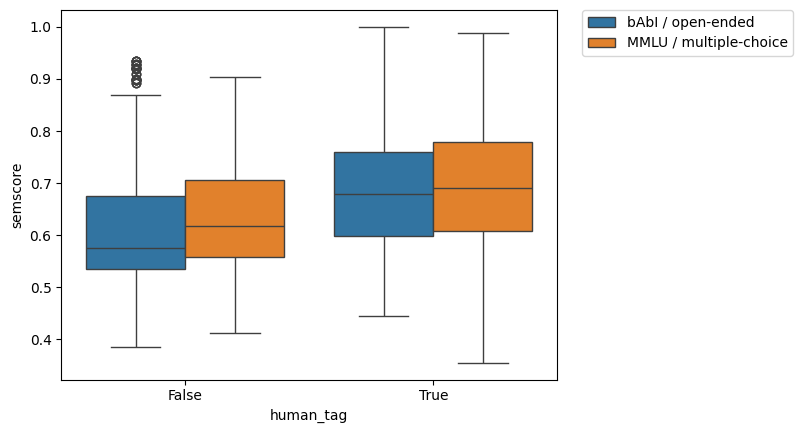

In [16]:
# semscore_df = merged_df.loc[merged_df["embedding_model"].str.contains("Qwen3-Reranker-0.6B-seq-cls")] # This run calcualted semscore
semscore_df = merged_df.loc[(merged_df["semscore"] != 0)]
# semscore_df.boxplot(by='human_tag', column =['semscore'],)
# sns.violinplot(data=semscore_df, x="human_tag", y="semscore", hue="task_type")
sns.boxplot(data=semscore_df, x="human_tag", y="semscore", hue="task_type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [17]:
# Calculate optimal threshold
opt_val = 0
thrs_opt = 0
for thrs in np.linspace(0.01,0.99,100):
    predicted_semscore = semscore_df['semscore'] > thrs
    opt = balanced_accuracy_score(semscore_df['human_tag'], predicted_semscore)
    if opt_val < opt:
        opt_val = opt
        thrs_opt = thrs
print(f"Optimal Threshold: {thrs_opt}\nBalanced Accuracy: {opt_val}")

Optimal Threshold: 0.6138383838383838
Balanced Accuracy: 0.6321647606195808


In [18]:
thrs = thrs_opt
predicted_semscore = semscore_df['semscore'] > thrs

# Calculate precision and recall
precision = precision_score(semscore_df['human_tag'], predicted_semscore)
recall = recall_score(semscore_df['human_tag'], predicted_semscore)
f1 = f1_score(semscore_df['human_tag'], predicted_semscore)
specificity = recall_score(1-semscore_df['human_tag'], 1-predicted_semscore)
balanced_accuracy = balanced_accuracy_score(semscore_df['human_tag'], predicted_semscore)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1: {f1:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

Precision: 0.88
Recall: 0.72
Specificity: 0.54
F1: 0.79
Balanced Accuracy: 0.63


# Baselines Comparisons

In [19]:
merged_to_compare_df = merged_df.loc[(merged_df["embedding_model"].str.contains(BEST_MODEL)) *\
                         (merged_df["enhance"]==BEST_IS_ENHANCED) *\
                         (merged_df["reranker"]==BEST_IS_RERANKER) *\
                         (merged_df["instruction_applied"]==BEST_IS_INSTRUCTED) ]
grouped_to_compare_df = merged_to_compare_df.groupby(['language_model',	'dataset_task']).agg(
        {
            'human_tag' : "mean", 
            'a-vert_match': "mean",
            'agree': "mean"
        }
    ).reset_index().sort_values("agree")
grouped_to_compare_df.head()

,language_model,dataset_task,human_tag,a-vert_match,agree
191,gpt-oss-20b,babi-task_10-indefinite_knowledge,0.900000,0.650000,0.750000
27,Meta-Llama-3-3-70B-Instruct-AWQ-INT4,mmlu_college_computer_science_chat_generative,0.800000,0.600000,0.800000
163,Qwen3-30B-A3B-GPTQ-Int4,mmlu_pro-category_engineering,0.250000,0.450000,0.800000
4,Meta-Llama-3-3-70B-Instruct-AWQ-INT4,babi-task_05-three_argument_relations,0.900000,0.733333,0.833333
9,Meta-Llama-3-3-70B-Instruct-AWQ-INT4,babi-task_10-indefinite_knowledge,0.966667,0.800000,0.833333


### MMLU-Pro --- Completions + Logits

In [20]:
logits_rows = list()
for lm_dir in os.listdir(BASELINES_PATH):
    model_path = os.path.join(BASELINES_PATH, lm_dir)
    if not os.path.isdir(model_path):
        continue
    # The file should be here
    for results_file in os.listdir(os.path.join(BASELINES_PATH, lm_dir, "mmlu_pro_categories")):
        if "results_" not in results_file:
            continue
        # Read all lines
        with open(os.path.join(BASELINES_PATH, lm_dir, "mmlu_pro_categories", results_file), 'r') as f:
            obj = json.load(f)
            for key in obj["results"].keys():
                if "mmlu_pro-category-leaderboard" in key:
                    logits_rows.append([
                        lm_dir,
                        "mmlu_pro-category"+key.split("mmlu_pro-category-leaderboard")[-1],
                        obj["results"][key]["acc,none"]
                    ])

logits_df = pd.DataFrame(logits_rows, columns=["language_model", "dataset_task", "acc_score"])
merged_logits_df = pd.merge(logits_df, grouped_to_compare_df, on=['language_model', 'dataset_task'])

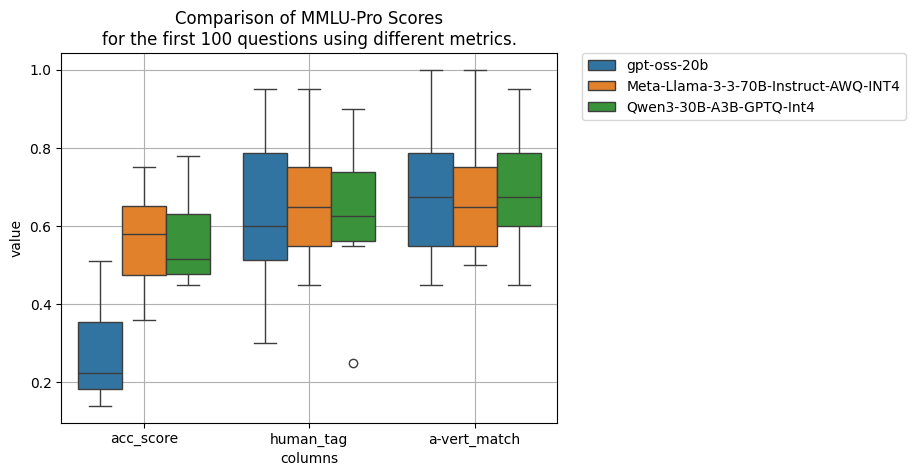

In [21]:
df_melt = merged_logits_df.melt(id_vars = 'language_model',
                  value_vars = ['acc_score', 'human_tag', 'a-vert_match'],
                  var_name = 'columns')

sns.boxplot(data = df_melt,
                hue = 'language_model', # different colors for different 'cls'
                x = 'columns',
                y = 'value',
                order = ['acc_score', 'human_tag', 'a-vert_match'] )
plt.grid()
plt.title('Comparison of MMLU-Pro Scores\nfor the first 100 questions using different metrics.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

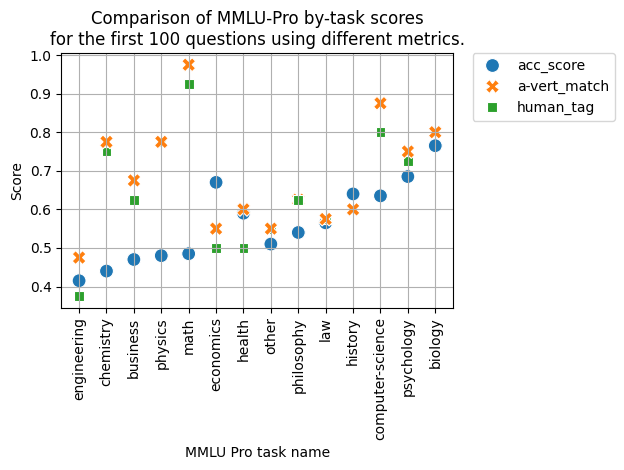

In [22]:
plot_df = merged_logits_df.loc[merged_logits_df["language_model"] != "gpt-oss-20b"]
plot_df = plot_df.melt(id_vars = ['dataset_task', "language_model"],
                  value_vars = ['acc_score', 'human_tag', 'a-vert_match'],
                  var_name = 'scorer')
plot_df = plot_df.groupby(["scorer", "dataset_task"]).agg({"value":"mean"}).reset_index()
plot_df = plot_df.sort_values("value",ascending=True)
plot_df["dataset_task"] = [a.split("mmlu_pro-category_")[-1] for a in plot_df["dataset_task"].values]
plot_df.head()

scatter = sns.scatterplot(data=plot_df, 
                          x="dataset_task",
                          y="value", 
                          hue='scorer', 
                          hue_order=['acc_score', 'a-vert_match', 'human_tag'], 
                          style='scorer', 
                          style_order=['acc_score', 'a-vert_match', 'human_tag'], 
                          s=100)
# pltylim(0.5,1.0)
plt.grid()
plt.title('Comparison of MMLU-Pro by-task scores\nfor the first 100 questions using different metrics.')
plt.xlabel("MMLU Pro task name")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### bAbI --- Completions + Exact-Match

In [23]:
logits_rows = list()
for lm_dir in os.listdir(BASELINES_PATH):
    model_path = os.path.join(BASELINES_PATH, lm_dir)
    if not os.path.isdir(model_path):
        continue
    # The file should be here
    for results_file in os.listdir(os.path.join(BASELINES_PATH, lm_dir, "babi_tasks")):
        if "results_" not in results_file:
            continue
        # Read all lines
        with open(os.path.join(BASELINES_PATH, lm_dir, "babi_tasks", results_file), 'r') as f:
            obj = json.load(f)
            for key in obj["results"].keys():
                if "babi_tasks_completions" in key:
                    logits_rows.append([
                        lm_dir,
                        "babi-task_"+key.split("babi_tasks_completions-task_")[-1],
                        obj["results"][key]["exact_match,get_response"]
                    ])

babi_base_df = pd.DataFrame(logits_rows, columns=["language_model", "dataset_task", "exact_match"])

merged_babi_base_df = pd.merge(babi_base_df, grouped_to_compare_df, on=['language_model', 'dataset_task'])


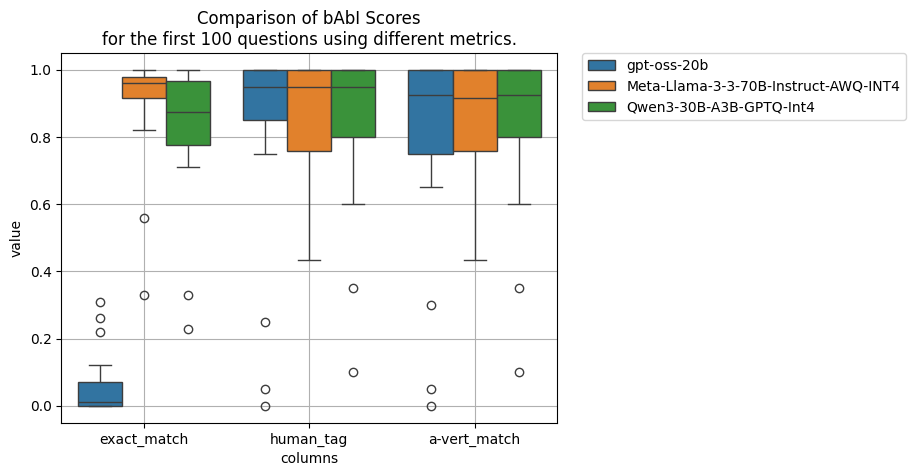

In [24]:
df_melt = merged_babi_base_df.melt(id_vars = 'language_model',
                  value_vars = ['exact_match', 'human_tag', 'a-vert_match'],
                  var_name = 'columns')

sns.boxplot(data = df_melt,
                hue = 'language_model', # different colors for different 'cls'
                x = 'columns',
                y = 'value',
                order = ['exact_match', 'human_tag', 'a-vert_match'] )
plt.grid()
plt.title('Comparison of bAbI Scores\nfor the first 100 questions using different metrics.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

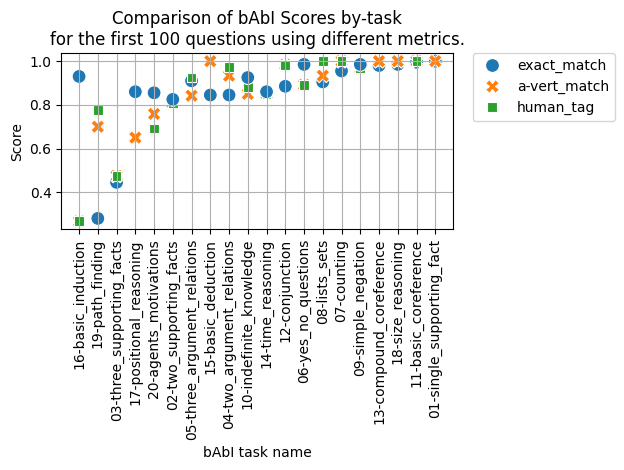

In [25]:
plot_df = merged_babi_base_df.loc[merged_babi_base_df["language_model"] != "gpt-oss-20b"]

plot_df = plot_df.melt(id_vars = ['dataset_task', "language_model"],
                  value_vars = ['exact_match', 'human_tag', 'a-vert_match'],
                  var_name = 'scorer')
plot_df = plot_df.groupby(["scorer", "dataset_task"]).agg({"value":"mean"}).reset_index()
plot_df = plot_df.sort_values("value",ascending=True)
plot_df["dataset_task"] = [a.split("babi-task_")[-1] for a in plot_df["dataset_task"].values]
plot_df.head()

scatter = sns.scatterplot(data=plot_df, 
                          x="dataset_task",
                          y="value", 
                          hue='scorer', 
                          hue_order=['exact_match', 'a-vert_match', 'human_tag'], 
                          style='scorer', 
                          style_order=['exact_match', 'a-vert_match', 'human_tag'], 
                          s=100)
# pltylim(0.5,1.0)
plt.grid()
plt.title('Comparison of bAbI Scores by-task\nfor the first 100 questions using different metrics.')
plt.xlabel("bAbI task name")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()